In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from PIL import Image
import cv2
from paddleocr import PaddleOCR

import torch

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

from paddleocr import PaddleOCR, draw_ocr

c:\Users\hoang\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
config = Cfg.load_config_from_name('vgg_seq2seq')

In [3]:
config['cnn']['pretrained']=False
config['device'] = "cpu"

In [4]:
detector = Predictor(config)

Model weight C:\Users\hoang\AppData\Local\Temp\vgg_seq2seq.pth exsits. Ignore download!


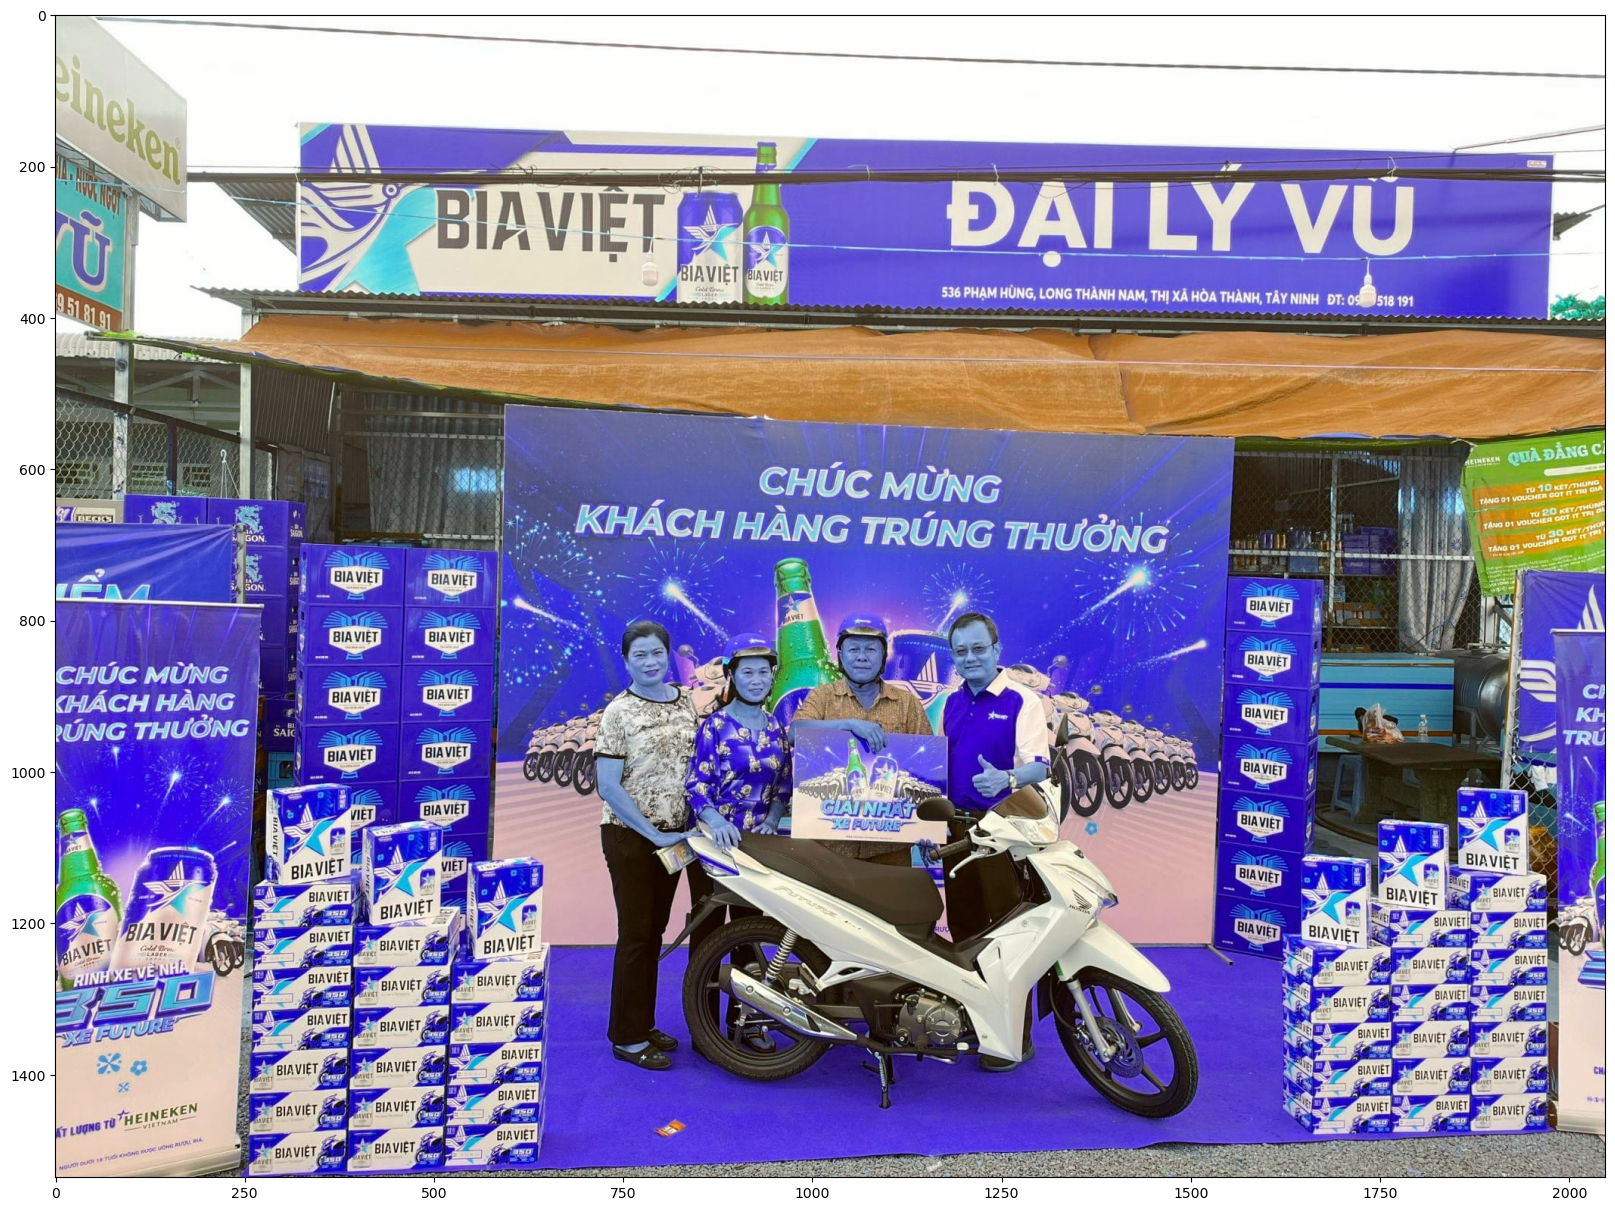

In [5]:
image_path = r'C:\Users\hoang\OneDrive\Desktop\nghich_prj\Hackathon\Hack-CMC-Heineken\data\FULL [Heineken Vietnam] Developer Resources\387792437_1499962164179099_5036152900747385591_n.jpg'
img = cv2.imread(image_path)
plt.figure(figsize=(20, 20))
plt.imshow(img)
plt.show()

In [6]:
paddle = PaddleOCR(use_angle_cls=False, lang="vi", use_gpu=False)
result = paddle.ocr(image_path, cls=False, det=True)#, rec=False)
result = result[:][:][0]

[2024/06/26 10:07:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\hoang/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\hoang/.paddleocr/whl\\rec\\latin\\latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_te

----------TEXT-----------


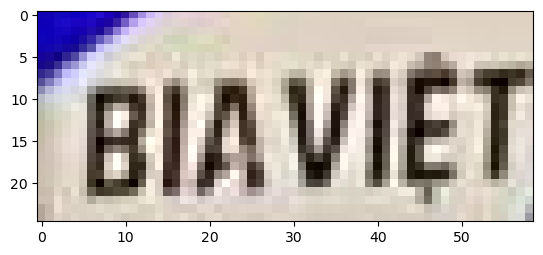

BIA VIỆT
----------TEXT-----------


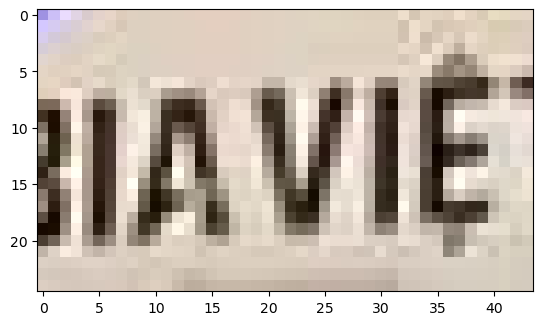

BIA VIỆT
----------TEXT-----------


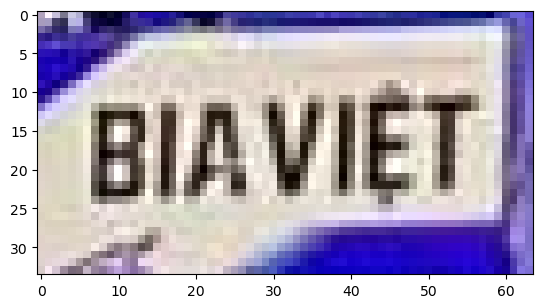

BIA VIỆT
----------TEXT-----------
----------TEXT-----------


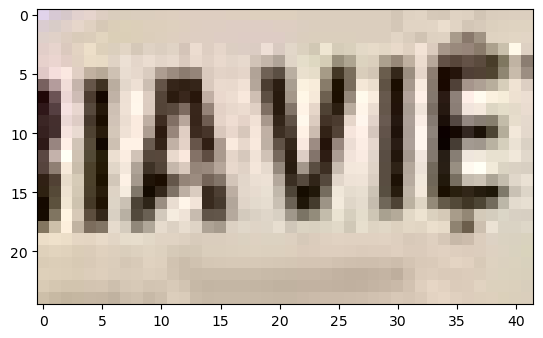

BIA VIỆT
----------TEXT-----------


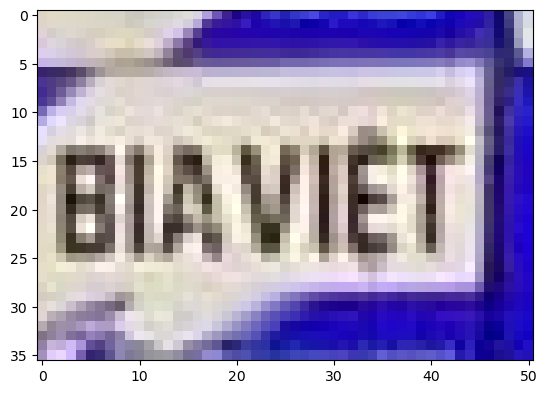

BIAVIỆT
----------TEXT-----------


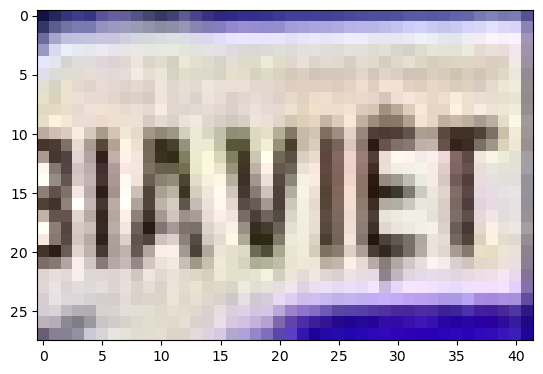

BIAVIỆT
----------TEXT-----------


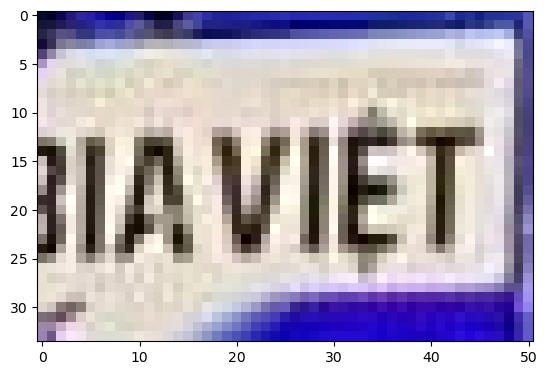

BIA VIỆT
----------TEXT-----------


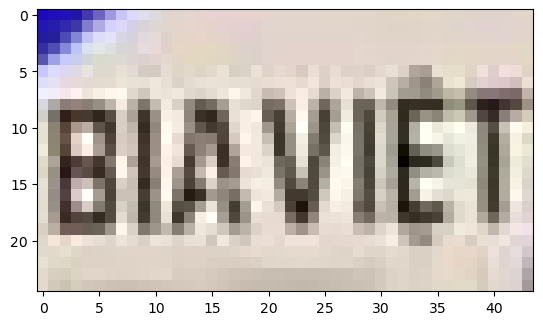

BIAVIỆT
----------TEXT-----------


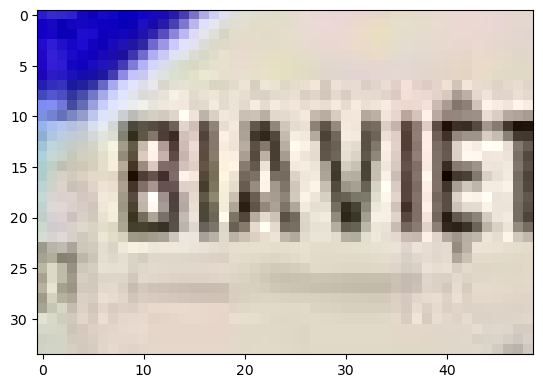

BIA VIỆT
----------TEXT-----------


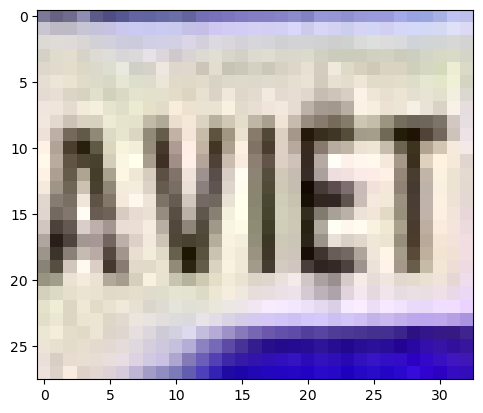

AVIỆT
----------TEXT-----------


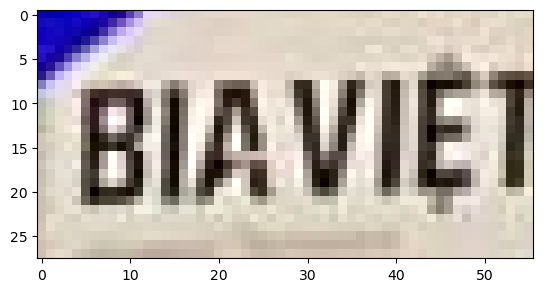

BIAVIỆT
----------TEXT-----------


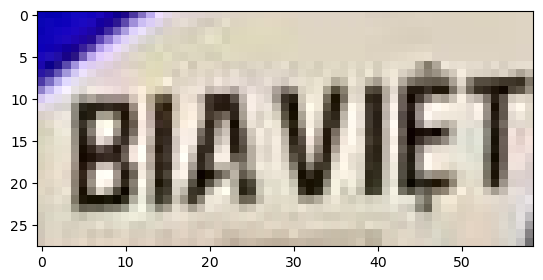

BIA VIỆT
----------TEXT-----------


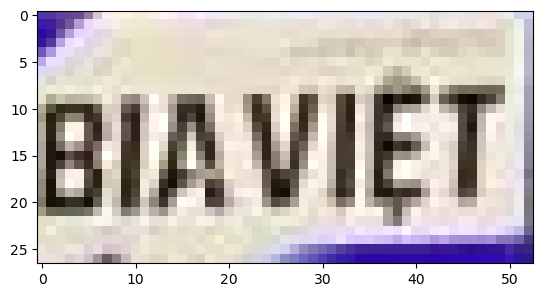

BIA VIỆT
----------TEXT-----------


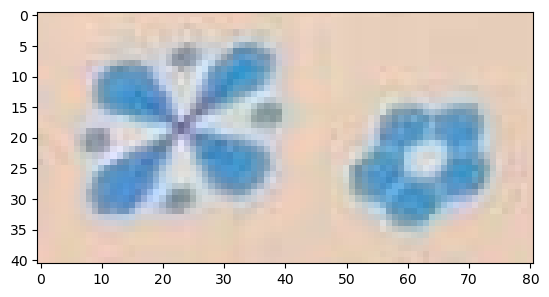

Xz
----------TEXT-----------


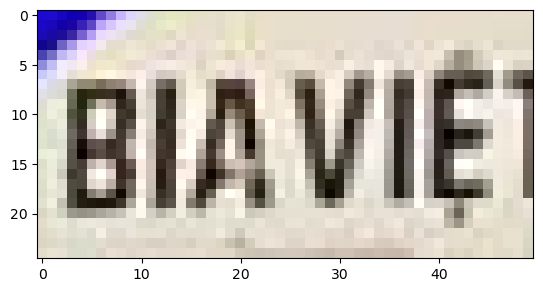

BIA VIỆT
----------TEXT-----------


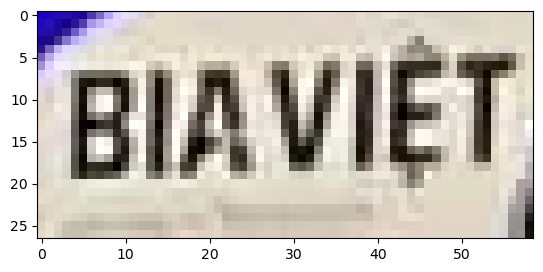

BIAVIỆT
----------TEXT-----------


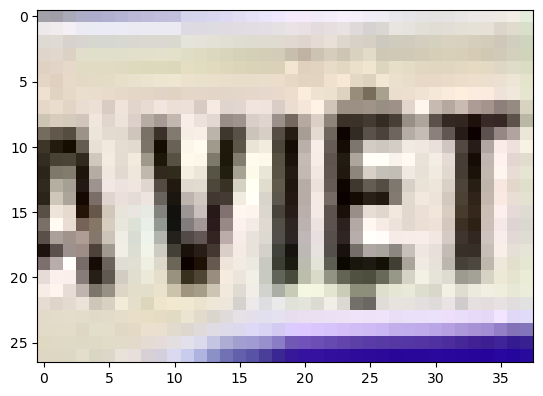

A VIỆT
----------TEXT-----------


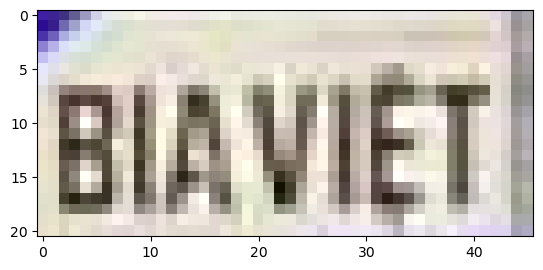

BIA VIỆT
----------TEXT-----------


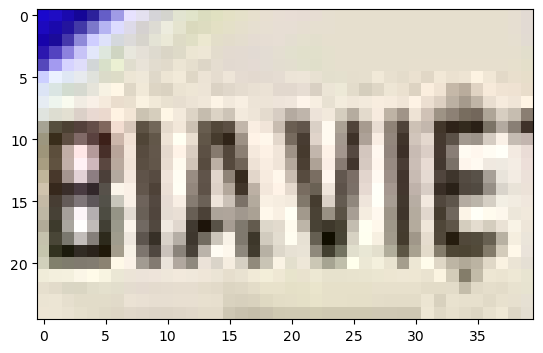

BIAVIỆT
----------TEXT-----------


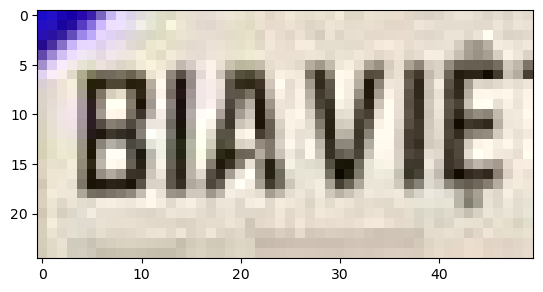

BIA VIỆT
----------TEXT-----------


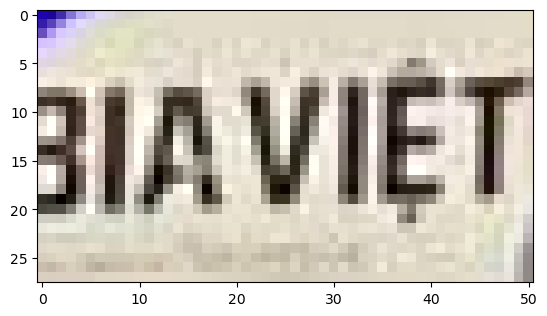

BIA VIỆT
----------TEXT-----------


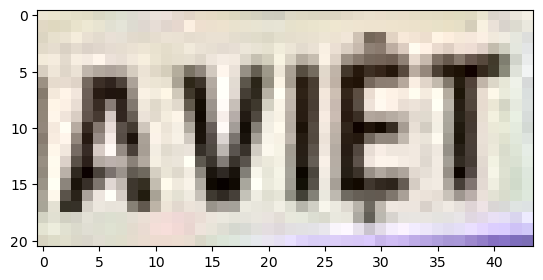

HAVIỆT
----------TEXT-----------


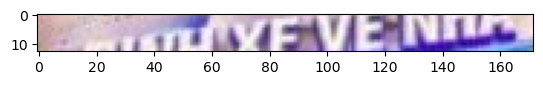

UNDERENTIVENESS
----------TEXT-----------


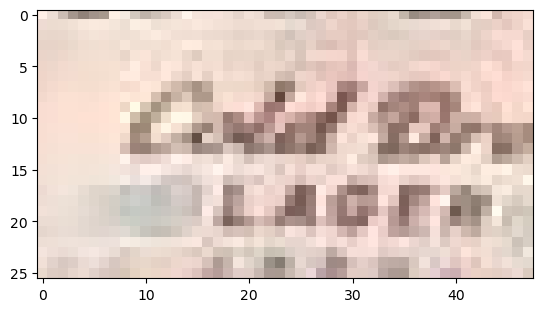

CAMP
----------TEXT-----------


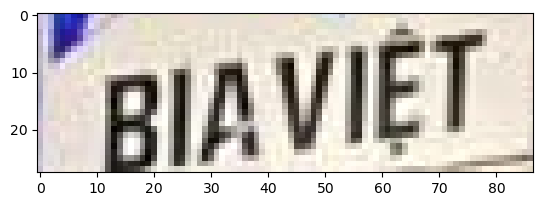

BIA VIỆT
----------TEXT-----------


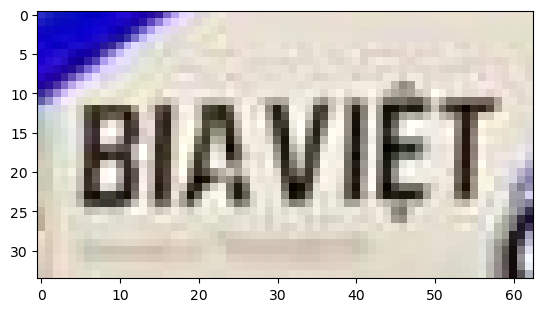

BIAVIỆT
----------TEXT-----------


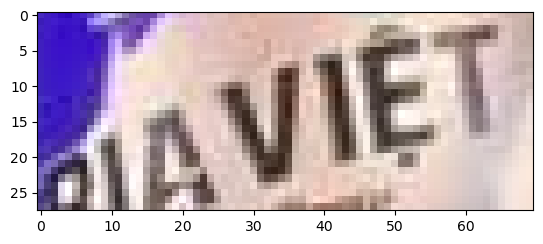

JAVIET
----------TEXT-----------


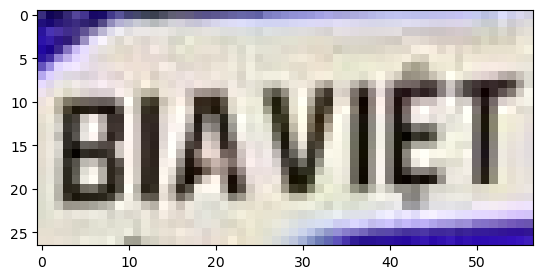

BIAVIỆT
----------TEXT-----------


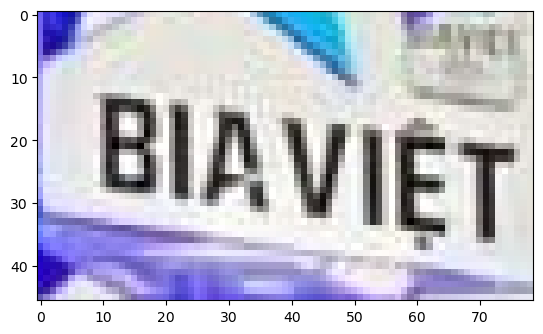

BIAVIET
----------TEXT-----------


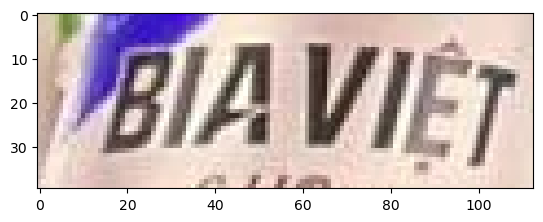

BIA VIỆT
----------TEXT-----------


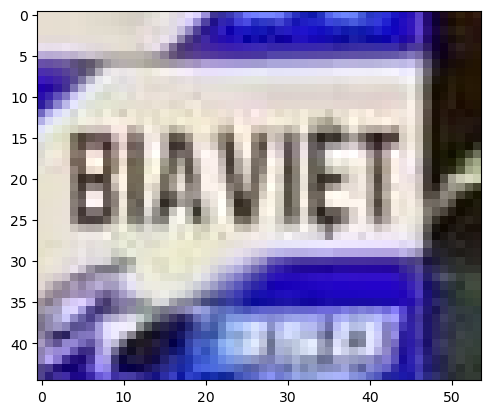

BIAVIET
----------TEXT-----------


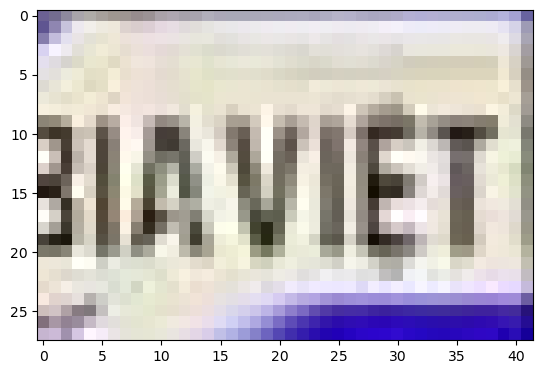

BIAVIỆT
----------TEXT-----------


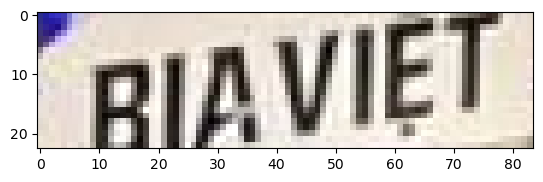

BIAVIỆT
----------TEXT-----------


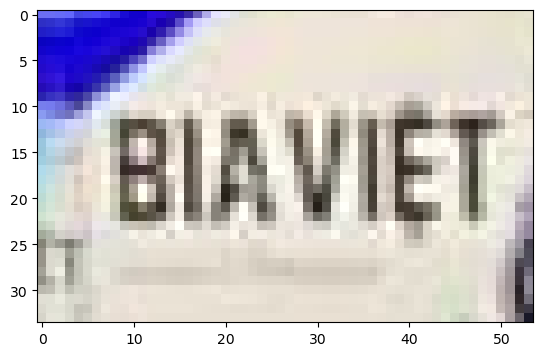

BIAVIỆT
----------TEXT-----------


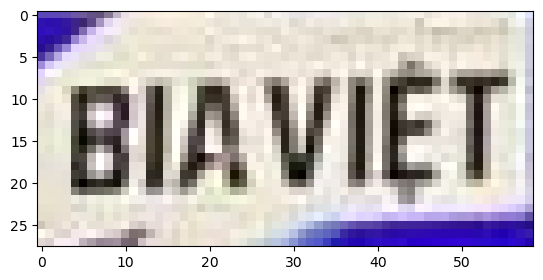

BIA VIỆT
----------TEXT-----------


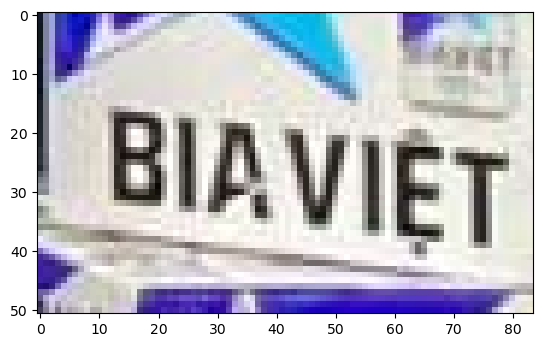

BIAVIỆT
----------TEXT-----------


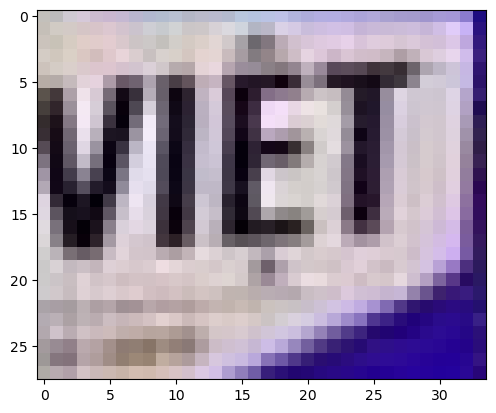

VIỆT
----------TEXT-----------


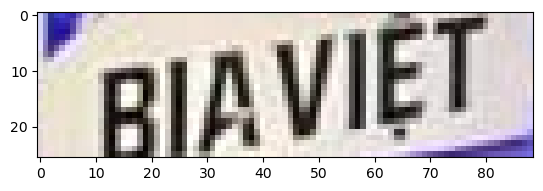

BIA VIỆT
----------TEXT-----------


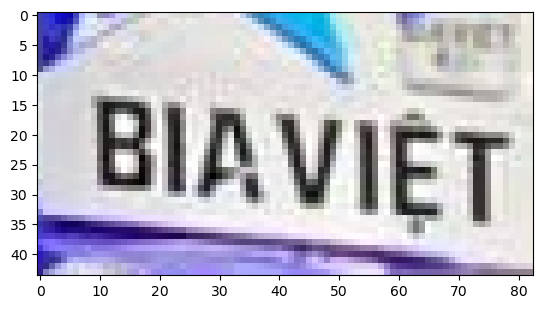

BIAVIỆT
----------TEXT-----------


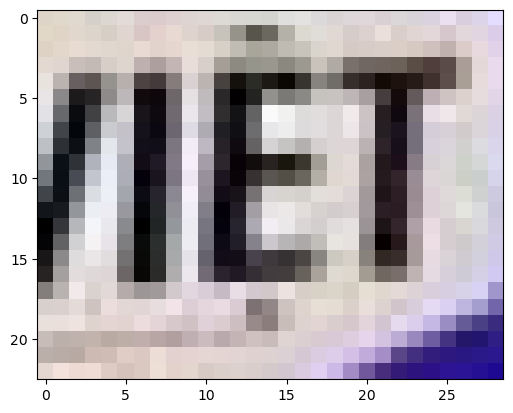

VIỆT
----------TEXT-----------


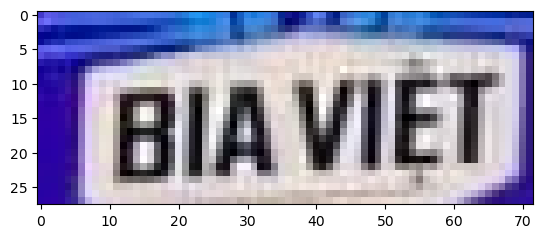

BIA VIỆT
----------TEXT-----------


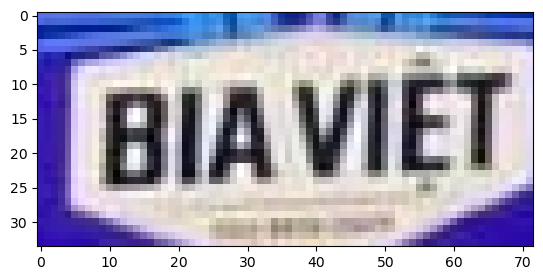

BIA VIỆT
----------TEXT-----------
----------TEXT-----------


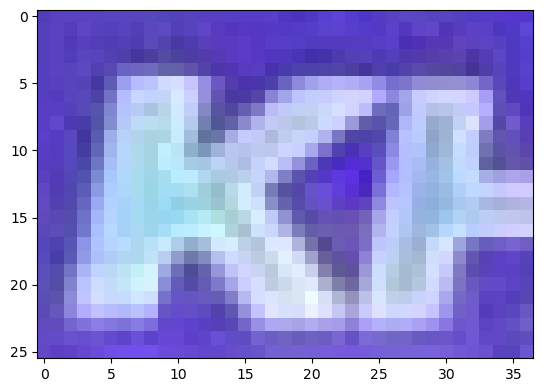

KH
----------TEXT-----------


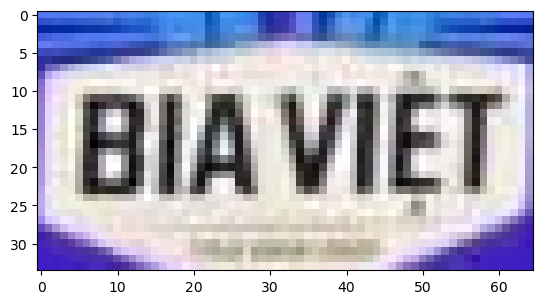

BIA VIỆT
----------TEXT-----------


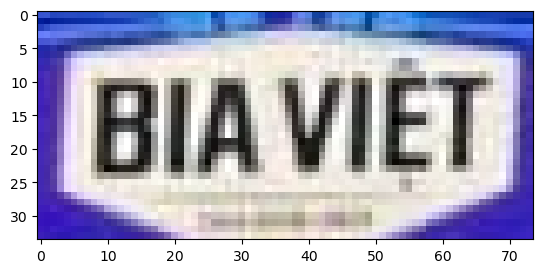

BIA VIỆT
----------TEXT-----------
----------TEXT-----------
----------TEXT-----------


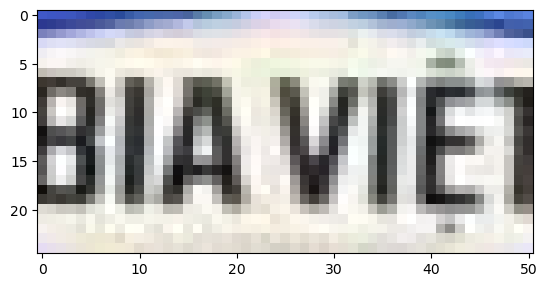

BIA VIỆT
----------TEXT-----------


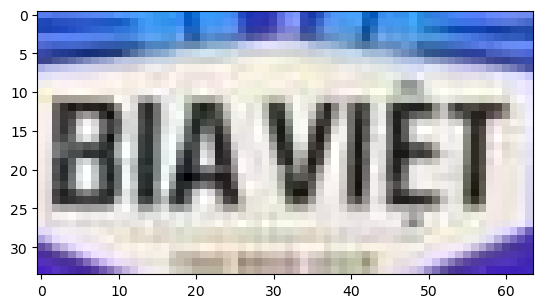

BIA VIỆT
----------TEXT-----------


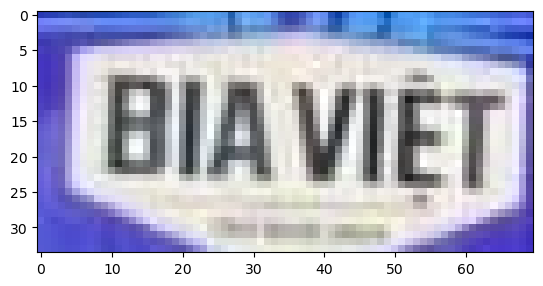

BIA VIỆT
----------TEXT-----------


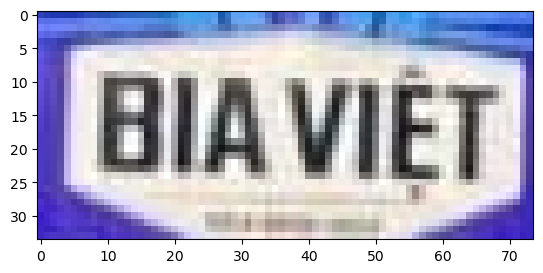

BIA VIỆT
----------TEXT-----------


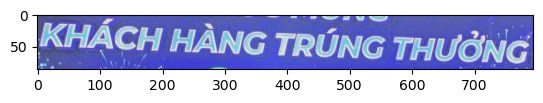

KHÁCH HÀNG TRÚNG THƯỞNG
----------TEXT-----------


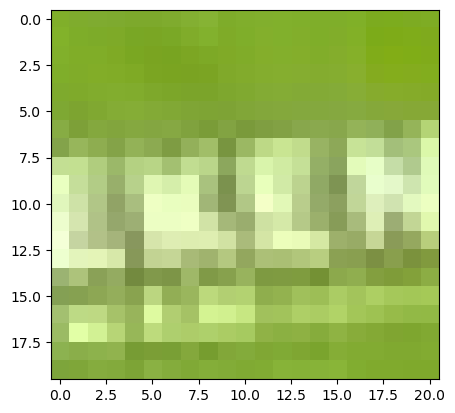

CKEN
----------TEXT-----------


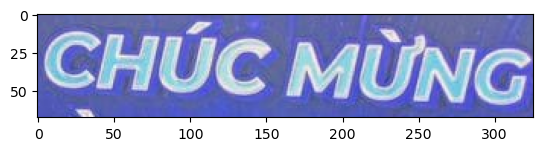

CHÚC MỪNG
----------TEXT-----------


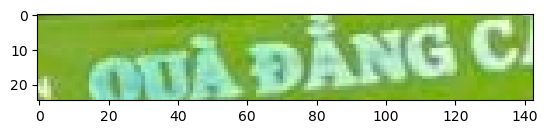

QUA ĐẢNG CA
----------TEXT-----------


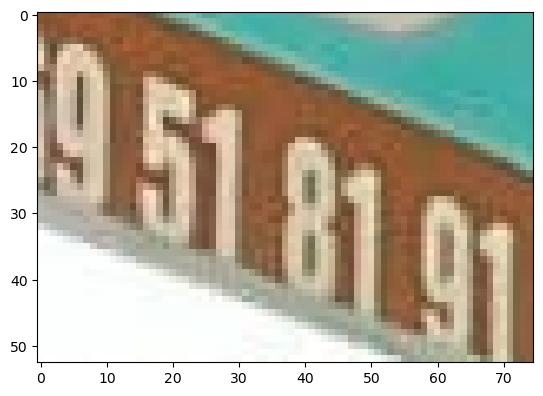

ASIBLY
----------TEXT-----------


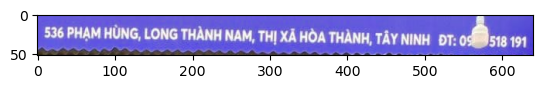

536 PHẠM HÙNG, LONG THÀNH NAM, THỊ XÃ HÒA THÀNH, TÂY NINH ĐT: CHA SIS IN
----------TEXT-----------


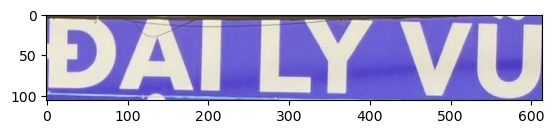

ĐAILLY VU
----------TEXT-----------


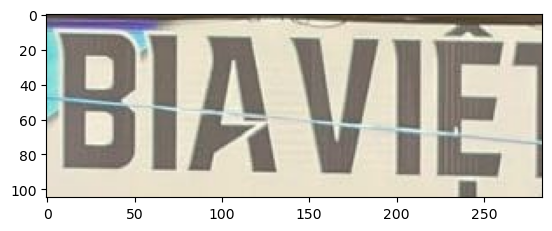

BIAVIỆT
----------TEXT-----------


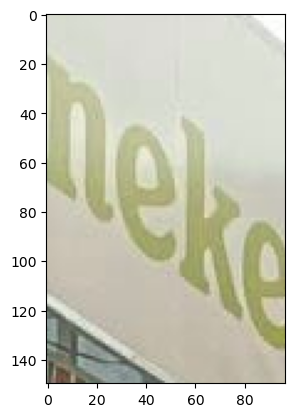

neke


In [7]:
boxes = []
for line in result:
  line = line[0]
  boxes.append([[int(line[0][0]), int(line[0][1])], [int(line[2][0]), int(line[2][1])]])

boxes = boxes[::-1]

EXPEND = 5
for box in boxes:
  box[0][0] = box[0][0] - EXPEND
  box[0][1] = box[0][1] - EXPEND
  box[1][0] = box[1][0] + EXPEND
  box[1][1] = box[1][1] + EXPEND


texts = []
for box in boxes:
  cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]

  try:
    cropped_image = Image.fromarray(cropped_image)
    print("----------TEXT-----------")
    plt.imshow(cropped_image)
    plt.show()
  except:
    continue

  #rec_result = Paddle.ocr(cropped_image, cls=True, det=False, rec=True)
  try:
    rec_result = detector.predict(cropped_image)

    text = rec_result#[0]

    texts.append(text)
    print(text)
  except Exception as e:
    print(str(e))

BIA VIỆT


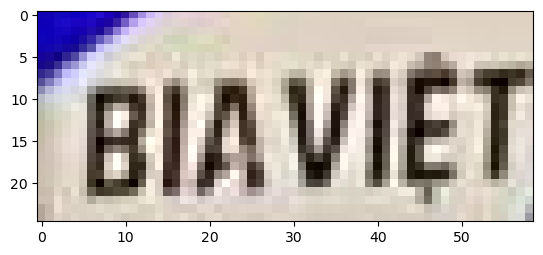

---------------------------------
BIA VIỆT


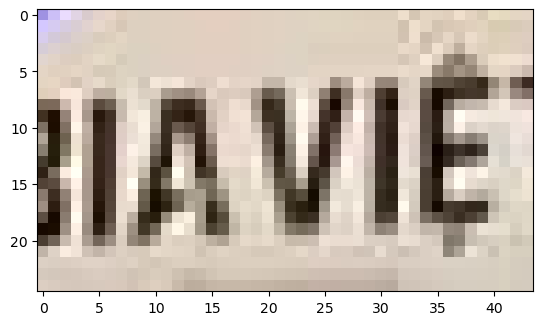

---------------------------------
BIA VIỆT


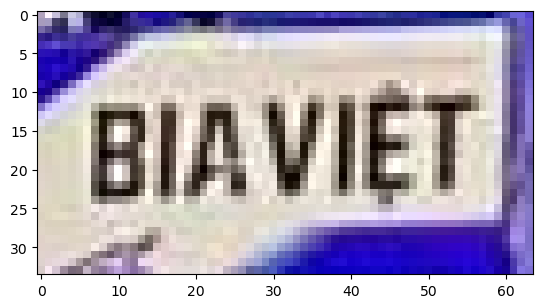

---------------------------------

BIA VIỆT


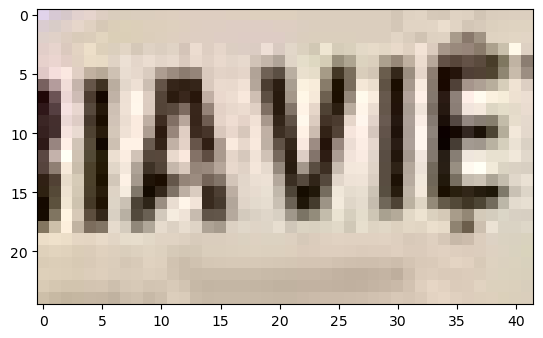

---------------------------------
BIAVIỆT


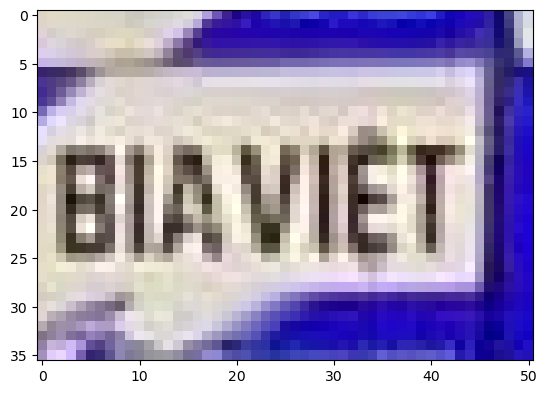

---------------------------------
BIAVIỆT


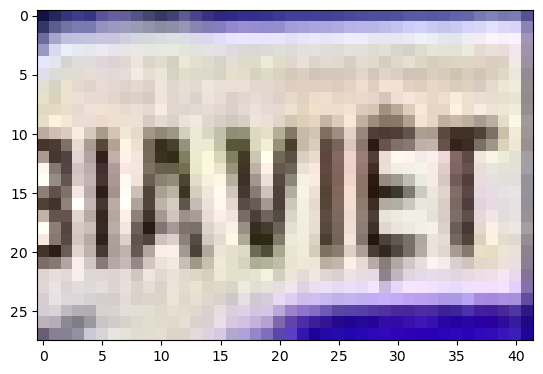

---------------------------------
BIA VIỆT


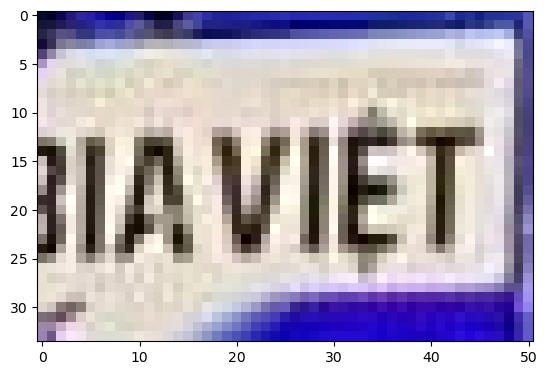

---------------------------------
BIAVIỆT


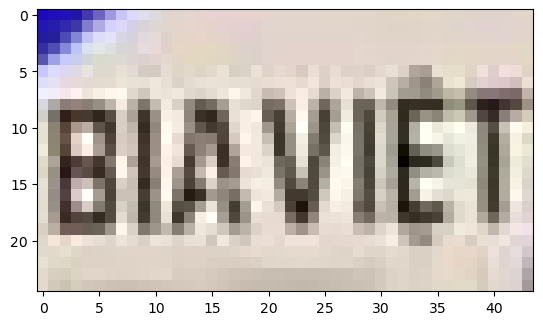

---------------------------------
BIA VIỆT


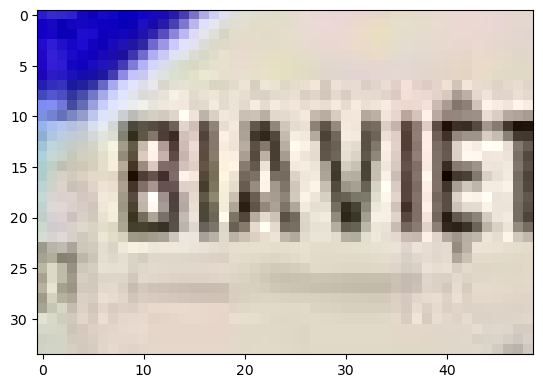

---------------------------------
AVIỆT


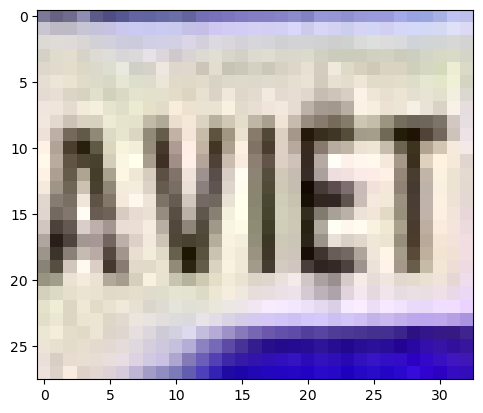

---------------------------------
BIAVIỆT


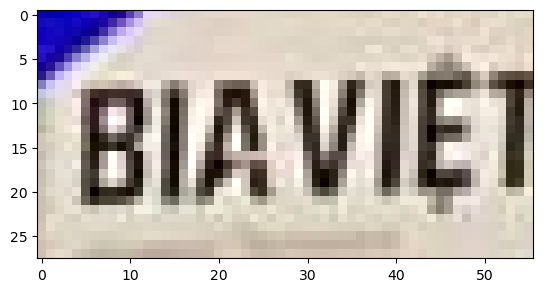

---------------------------------
BIA VIỆT


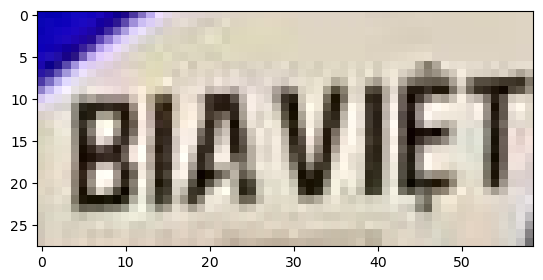

---------------------------------
BIA VIỆT


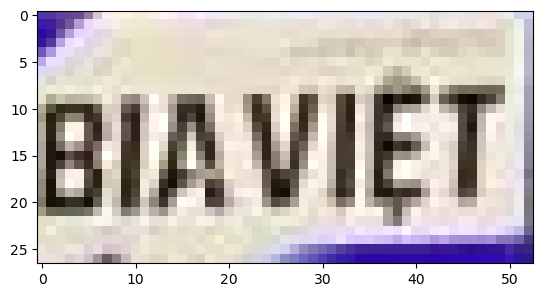

---------------------------------
Xz


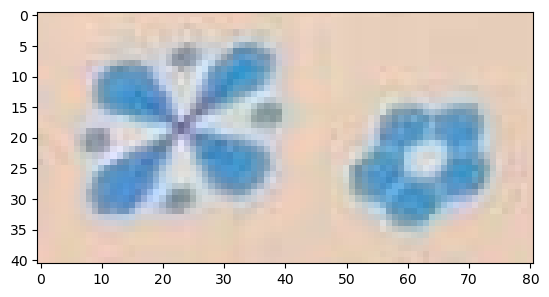

---------------------------------
BIA VIỆT


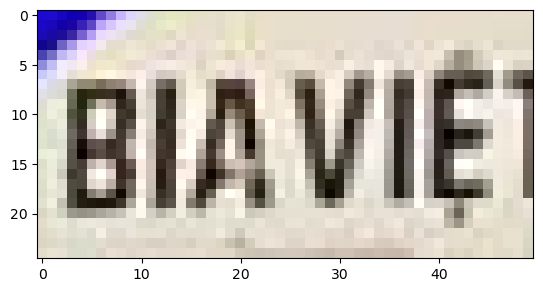

---------------------------------
BIAVIỆT


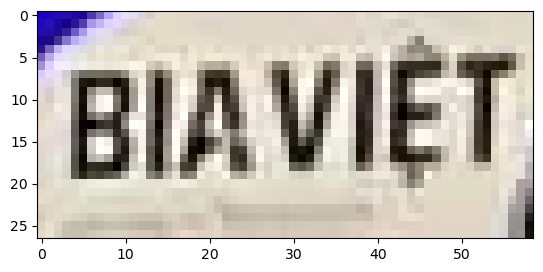

---------------------------------
A VIỆT


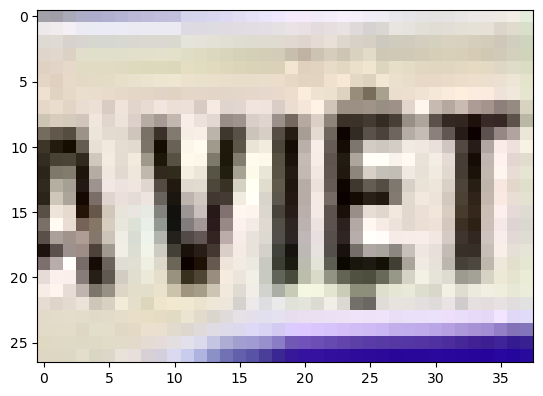

---------------------------------
BIA VIỆT


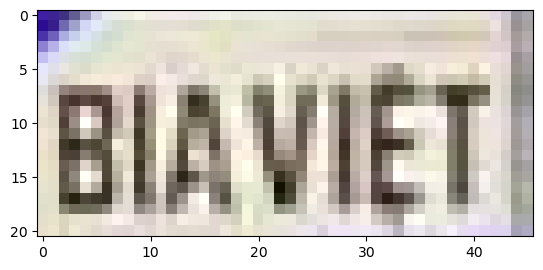

---------------------------------
BIAVIỆT


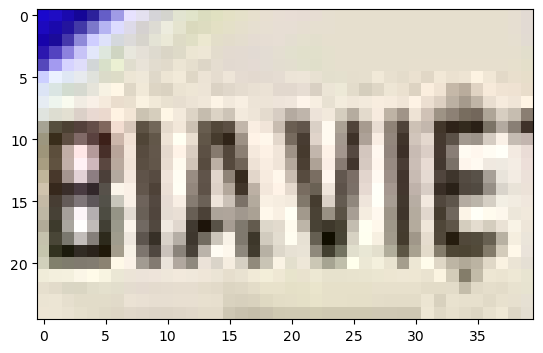

---------------------------------
BIA VIỆT


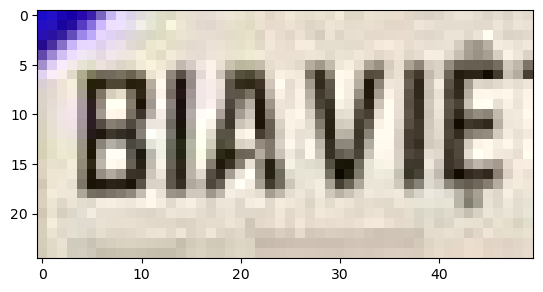

---------------------------------
BIA VIỆT


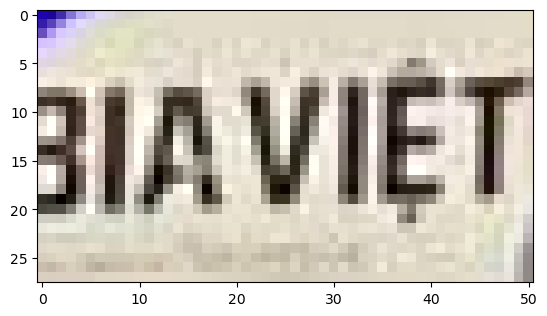

---------------------------------
HAVIỆT


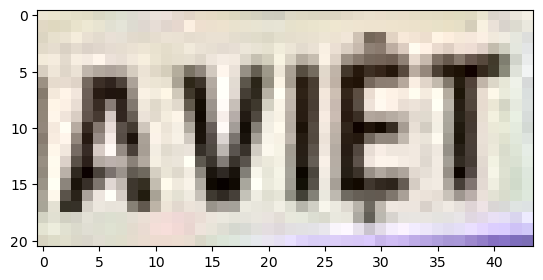

---------------------------------
UNDERENTIVENESS


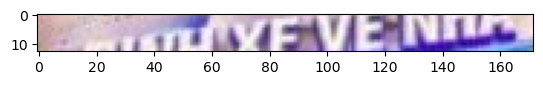

---------------------------------
CAMP


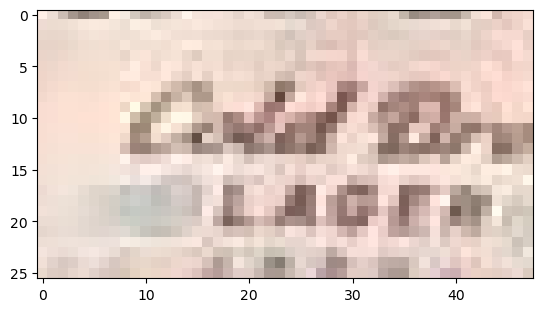

---------------------------------
BIA VIỆT


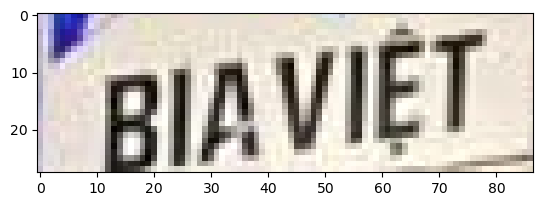

---------------------------------
BIAVIỆT


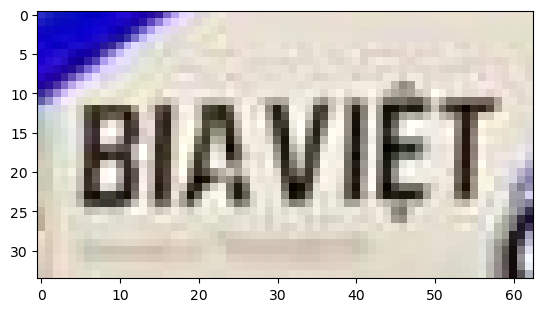

---------------------------------
JAVIET


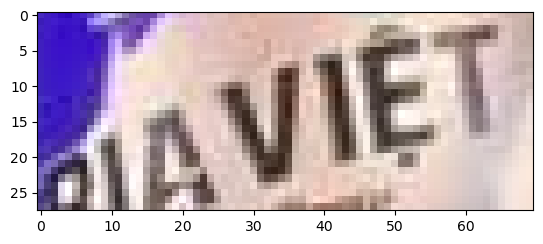

---------------------------------
BIAVIỆT


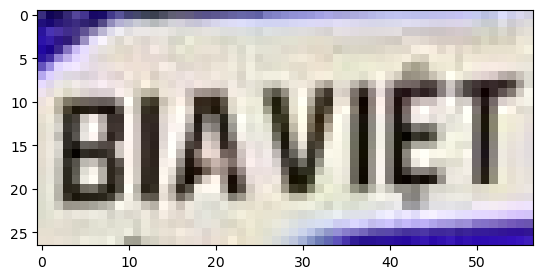

---------------------------------
BIAVIET


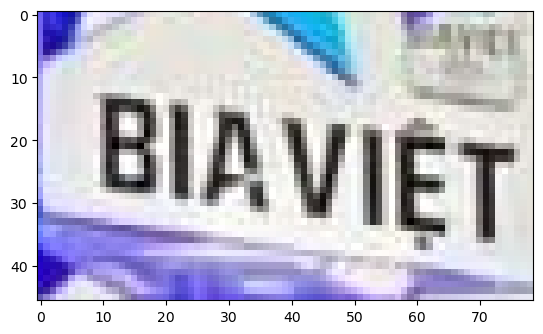

---------------------------------
BIA VIỆT


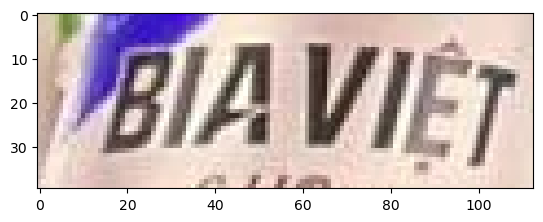

---------------------------------
BIAVIET


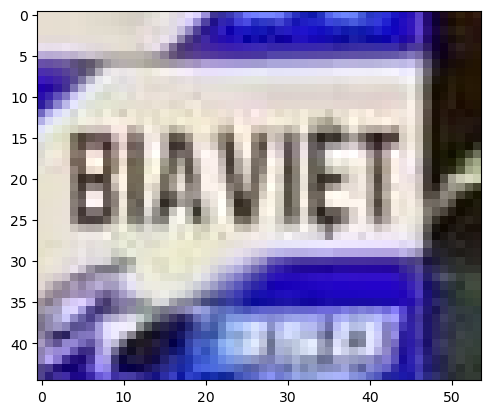

---------------------------------
BIAVIỆT


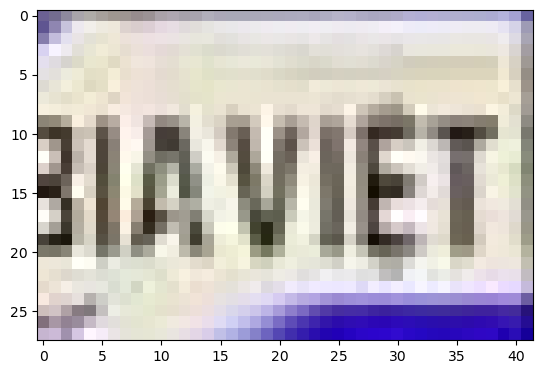

---------------------------------
BIAVIỆT


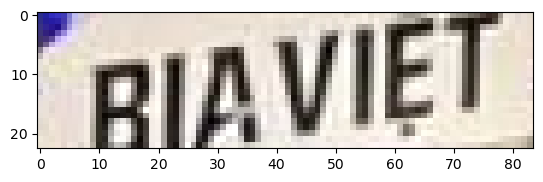

---------------------------------
BIAVIỆT


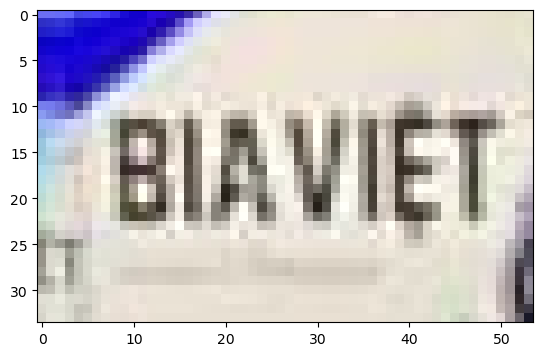

---------------------------------
BIA VIỆT


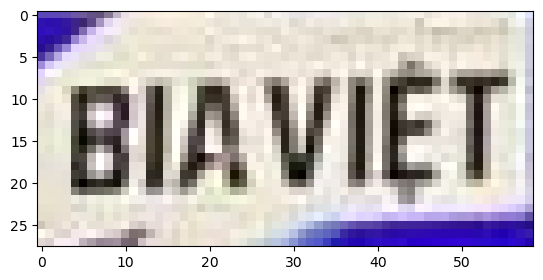

---------------------------------
BIAVIỆT


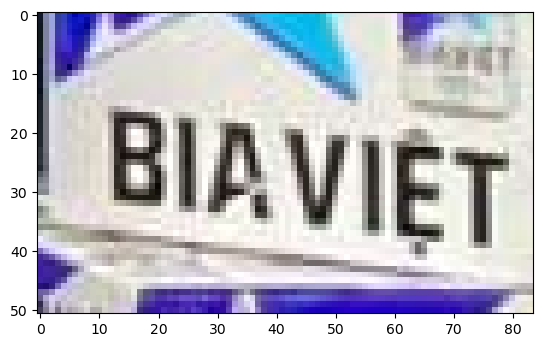

---------------------------------
VIỆT


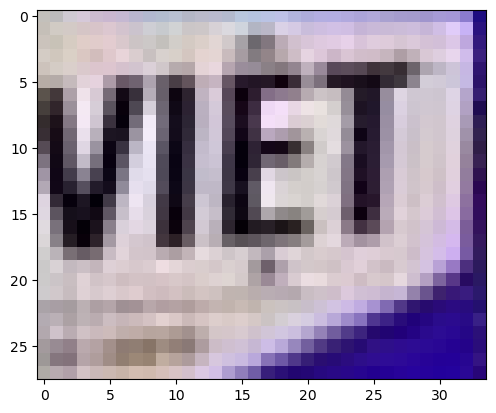

---------------------------------
BIA VIỆT


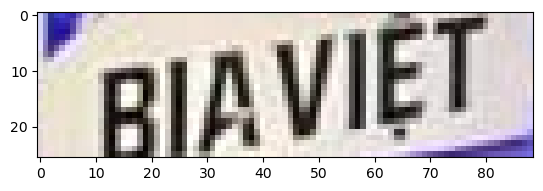

---------------------------------
BIAVIỆT


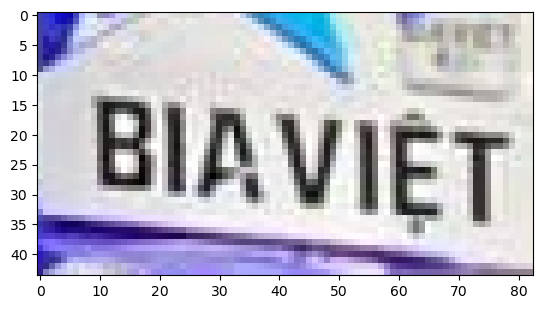

---------------------------------
VIỆT


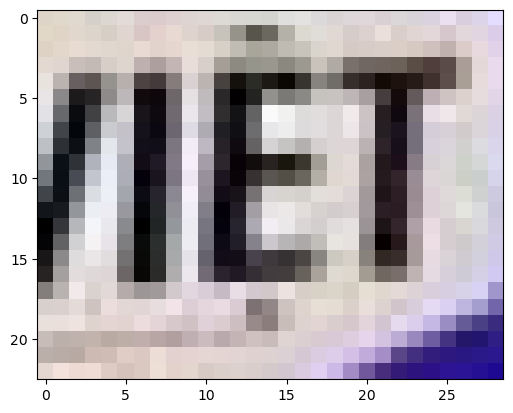

---------------------------------
BIA VIỆT


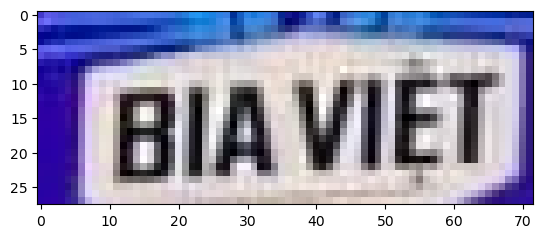

---------------------------------
BIA VIỆT


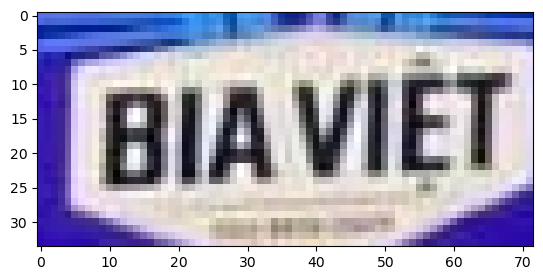

---------------------------------

KH


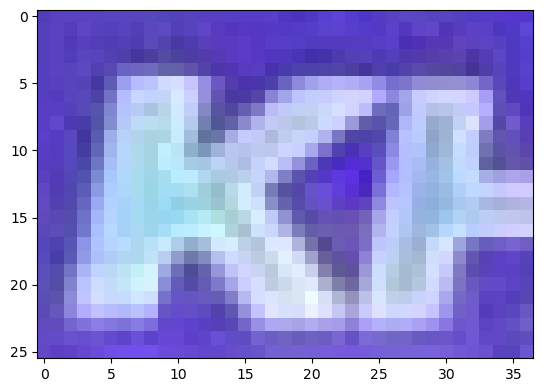

---------------------------------
BIA VIỆT


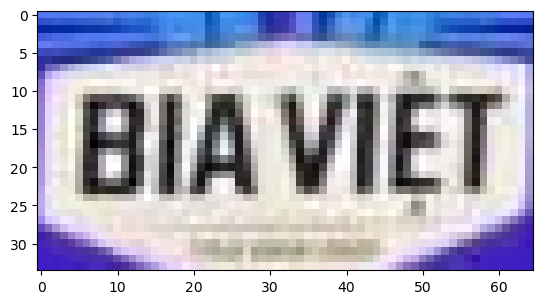

---------------------------------
BIA VIỆT


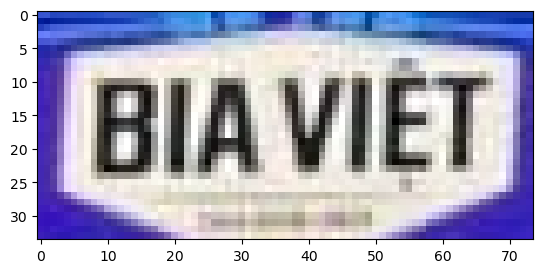

---------------------------------


BIA VIỆT


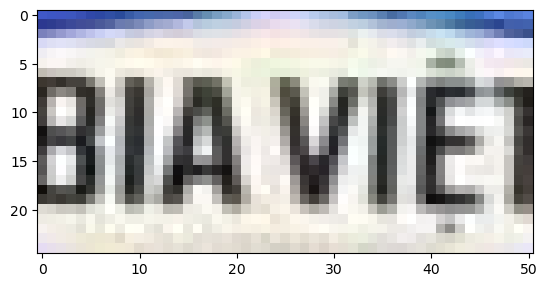

---------------------------------
BIA VIỆT


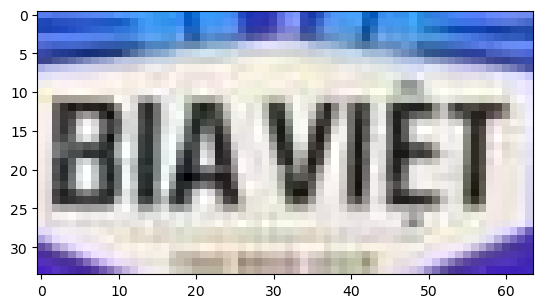

---------------------------------
BIA VIỆT


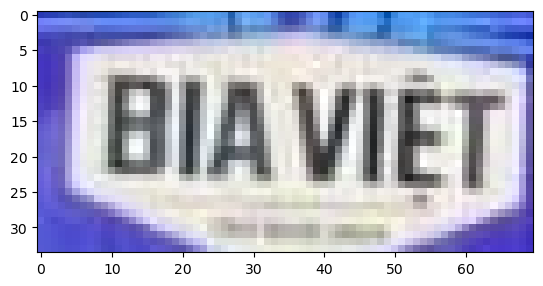

---------------------------------
BIA VIỆT


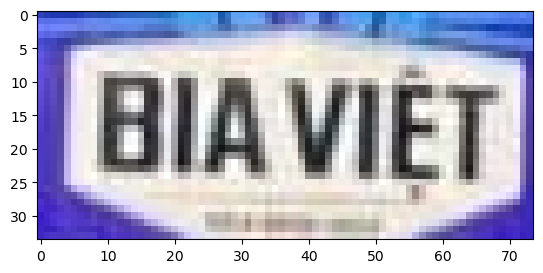

---------------------------------
KHÁCH HÀNG TRÚNG THƯỞNG


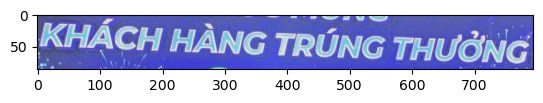

---------------------------------
CKEN


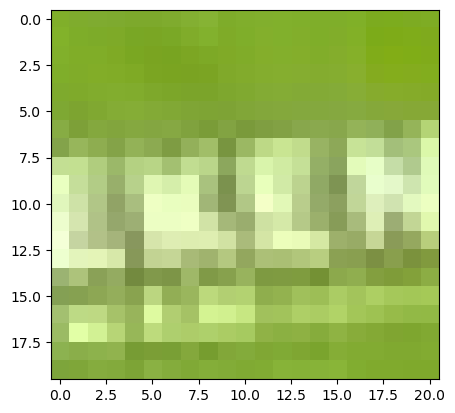

---------------------------------
CHÚC MỪNG


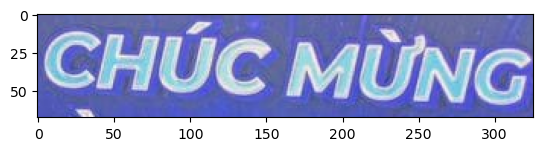

---------------------------------
QUA ĐẢNG CA


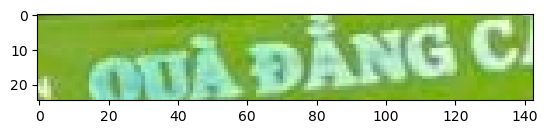

---------------------------------
ASIBLY


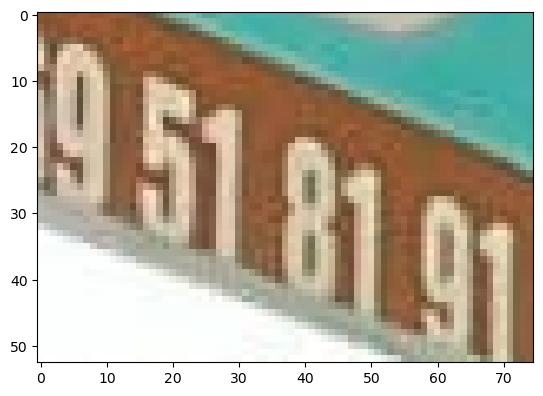

---------------------------------
536 PHẠM HÙNG, LONG THÀNH NAM, THỊ XÃ HÒA THÀNH, TÂY NINH ĐT: CHA SIS IN


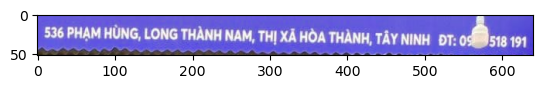

---------------------------------
ĐAILLY VU


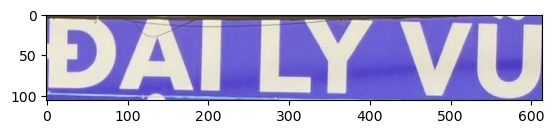

---------------------------------
BIAVIỆT


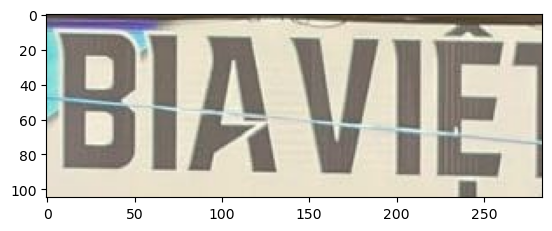

---------------------------------
neke


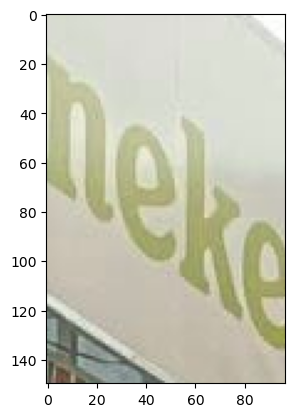

---------------------------------


In [8]:
for box in boxes:
  cropped_image = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
  try:
    rec_result = detector.predict(Image.fromarray(cropped_image))
    text = rec_result#[0]
    print(text)
    plt.imshow(cropped_image)
    plt.show()
    print('---------------------------------')
  except:
    pass